 Steve ENYEGUE **20181108** et Bilel RIMANI **20190264**


## Crytocurrencies price analysis

Firstly we're trying to have an output of the price evolution for one single cryptocurrency.
We extracted data from this [exchange](https://www.poloniex.com)


In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as npgogo
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn.cluster import KMeans


def CryptoData(symbol, frequency):
    #Returns: df from first available date
    url ='https://poloniex.com/public?command=returnChartData&currencyPair='+symbol+'&end=9999999999&period='+str(frequency)+'&start=0'
    df = pd.read_json(url) 
    #pd.read_csv() loads CSV file into a data frame
    df.set_index('date',inplace=True)
    return df

currency_name = input("Please insert a cryptocurrency to analyse:")
#Examples of input: USDT_ETH, USDT_BTC




Please insert a cryptocurrency to analyse:USDT_LTC


Now we are going to get the daily cryptocurrrency close data. It's up to you if you want to replace "close" in the code by another parameter from the "high-low-close-volume" chart.

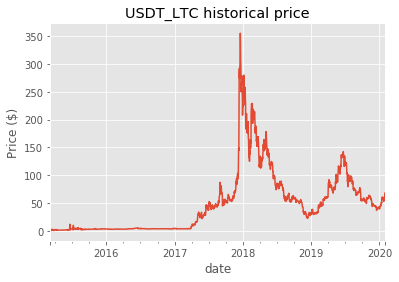

In [2]:
df = CryptoData(currency_name, 86400)['close']
plt.title("%s historical price"%currency_name) #String formatting
plt.ylabel("Price ($)")
df.plot()


In [3]:
df.pct_change().describe()

count    1791.000000
mean        0.021167
std         0.502993
min        -0.850000
25%        -0.021987
50%         0.000000
75%         0.025425
max        20.333356
Name: close, dtype: float64

Let's plot histogram of percentage returns to see how volatile is the coin.

Text(0.5, 1.0, 'USDT_LTC Daily Close Returns Distribution')

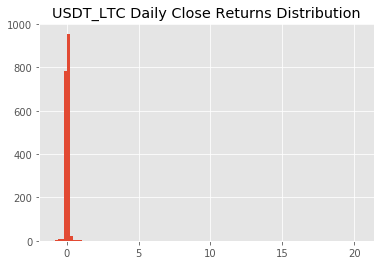

In [4]:
distrib = df.pct_change().hist(bins=100)

plt.title("%s Daily Close Returns Distribution"%currency_name)

In [5]:
df.head(),df.tail()

(date
 2015-03-07    0.045000
 2015-03-08    0.045000
 2015-03-09    0.045000
 2015-03-10    0.960001
 2015-03-11    0.960001
 Name: close, dtype: float64, date
 2020-01-27    58.515762
 2020-01-28    60.676386
 2020-01-29    59.819527
 2020-01-30    67.985785
 2020-01-31    67.455782
 Name: close, dtype: float64)

Now let's load the information of several cryptocurrencies at the same time.

In [6]:
def CryptoDataCSV(symbol, frequency):
    #Returns: df from first available date
    url ='https://poloniex.com/public?command=returnChartData&currencyPair='+symbol+'&end=9999999999&period='+str(frequency)+'&start=0'
    df = pd.read_json(url)
    df.set_index('date',inplace=True)
    df.to_csv(symbol + '.csv')
    print('Processed: ' + symbol)
    
#Putting together the closing prices into a variable
    
tickers =  ['USDT_BTC','USDT_ETC','USDT_XMR','USDT_ETH','USDT_DASH',
 'USDT_XRP','USDT_LTC']

for ticker in tickers:
    CryptoDataCSV(ticker, 86400)




Processed: USDT_BTC
Processed: USDT_ETC
Processed: USDT_XMR
Processed: USDT_ETH
Processed: USDT_DASH
Processed: USDT_XRP
Processed: USDT_LTC


Now let's put the dataframe of closing prices in a variable.


In [7]:
crypto_df = pd.DataFrame()
for ticker in tickers:
    crypto_df[ticker] = pd.read_csv(ticker+'.csv', index_col = 'date')['close']
    
crypto_df_pct = crypto_df.pct_change().dropna()


In [8]:
crypto_df_pct.tail()

,USDT_BTC,USDT_ETC,USDT_XMR,USDT_ETH,USDT_DASH,USDT_XRP,USDT_LTC
date,,,,,,,
2020-01-27,0.034344,0.132581,0.025777,0.012520,0.017979,-0.003457,0.039569
2020-01-28,0.053036,0.094511,0.035089,0.033968,0.031112,0.036580,0.036924
2020-01-29,-0.008408,0.074516,0.030887,-0.011132,0.044220,-0.014876,-0.014122
2020-01-30,0.022444,0.004107,0.072811,0.062583,0.003457,0.035582,0.136515
2020-01-31,-0.022117,-0.103806,-0.055896,-0.032382,-0.057888,-0.027765,-0.007796


In [9]:
type(crypto_df_pct)

pandas.core.frame.DataFrame

We can see the type of the dataframe. However, the clustering Kmeans method only works for arrays. So we have to convert the dataframe into an array.

In [10]:
array = crypto_df_pct.to_numpy()

Seven different cryptocurrencies, so seven different columns.

In [11]:
crypto_df_pct.shape

(1282, 7)

In this example we chose to analyse DASH and XMR (respectively 4th and 2nd column).

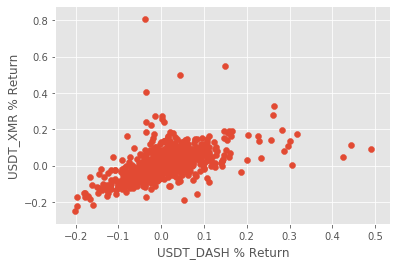

In [12]:
plt.figure(figsize=(6, 4))
plt.scatter(array[:,4],array[:,2])
plt.xlabel('USDT_DASH % Return')
plt.ylabel('USDT_XMR % Return')
plt.show()


At this point, we thought it would be interesting to do a clustering :

How many clusters do you see ?3


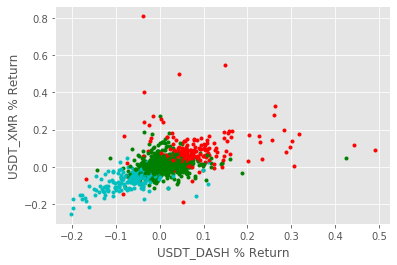

In [13]:
number_of_clusters = int(input("How many clusters do you see ?")) 
clf = KMeans(n_clusters=number_of_clusters) #Define the number of clusters
clf.fit(array)

labels = clf.labels_

colors = ["g.","r.","c.","b.","k.","o."]

for i in range(len(array)):
    plt.plot(array[i][4],array[i][2], colors[labels[i]])
    
plt.xlabel('USDT_DASH % Return')
plt.ylabel('USDT_XMR % Return')
plt.show()

statsmodels is a module that provides classes and functions for statistical data exploration. We're just going to use it to output the summary.

In [14]:
import statsmodels.api as sm
model = sm.OLS(crypto_df_pct['USDT_XMR'],
               crypto_df_pct['USDT_DASH']).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               USDT_XMR   R-squared (uncentered):                   0.301
Model:                            OLS   Adj. R-squared (uncentered):              0.301
Method:                 Least Squares   F-statistic:                              552.0
Date:                Fri, 31 Jan 2020   Prob (F-statistic):                   8.64e-102
Time:                        11:20:00   Log-Likelihood:                          1819.0
No. Observations:                1282   AIC:                                     -3636.
Df Residuals:                    1281   BIC:                                     -3631.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
USDT_DASH      0.6140      0.026     23.495      0.000       0.563       0.665
==============================================================================
Omnibus:                     1129.502   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            91466.441
Skew:                           3.652   Prob(JB):                         0.00
Kurtosis:                      43.731   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Finally, we are going to compute the linear regression ourselves, without a module.

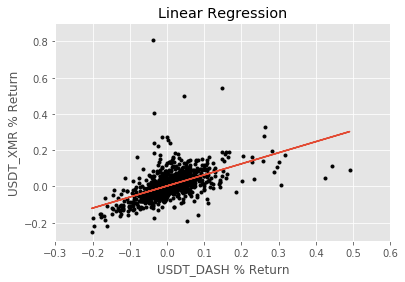

In [16]:
plt.figure()

axis = plt.axis([-0.3, 0.6, -0.3 ,0.9])
m, b = np.polyfit(array[:,4],array[:,2],1) #polynomial fit function that accepts the data set and returns an array of coefficients that minimizes the squared error
plt.grid(True)
plt.plot(array[:,4],array[:,2], 'k.')
plt.plot(array[:,4], m*array[:,4] + b, '-') #Linear function form is f(x)=ax+b
plt.title('Linear Regression')
plt.xlabel('USDT_DASH % Return')
plt.ylabel('USDT_XMR % Return')

plt.show()